In [1]:
# ==========================
# 🔥 Fire Incidents Analysis
# ==========================

In [2]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Set style
sns.set(style="whitegrid", palette="Set2")

In [6]:
# 2. Load dataset (replace 'fire_incidents.csv' with your dataset file)
df = pd.read_csv("Fire-Incidents.csv")

In [7]:
# 3. Create output folder for charts
output_dir = "charts"
os.makedirs(output_dir, exist_ok=True)

In [8]:
# 4. Quick overview
print("Data Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

Data Shape: (11214, 27)
Columns: ['Area_of_Origin', 'Business_Impact', 'Civilian_Casualties', 'Count_of_Persons_Rescued', 'Estimated_Dollar_Loss', 'Estimated_Number_Of_Persons_Displaced', 'Ext_agent_app_or_defer_time', 'Extent_Of_Fire', 'Fire_Alarm_System_Impact_on_Evacuation', 'Fire_Alarm_System_Operation', 'Fire_Alarm_System_Presence', 'Fire_Under_Control_Time', 'Ignition_Source', 'Incident_Station_Area', 'Incident_Ward', 'Last_TFS_Unit_Clear_Time', 'Latitude', 'Longitude', 'Material_First_Ignited', 'Method_Of_Fire_Control', 'Possible_Cause', 'Property_Use', 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure', 'Smoke_Alarm_at_Fire_Origin_Alarm_Type', 'Status_of_Fire_On_Arrival', 'TFS_Alarm_Time', 'TFS_Arrival_Time']
                                      Area_of_Origin  \
0                                   Porch or Balcony   
1                            Cooking Area or Kitchen   
2     Living Area (e.g. living, TV, recreation, etc)   
3                        Undetermined  (formerly 98)   
4

In [9]:
# ============================================
# 🔍 Analysis Questions & Visualizations
# ============================================

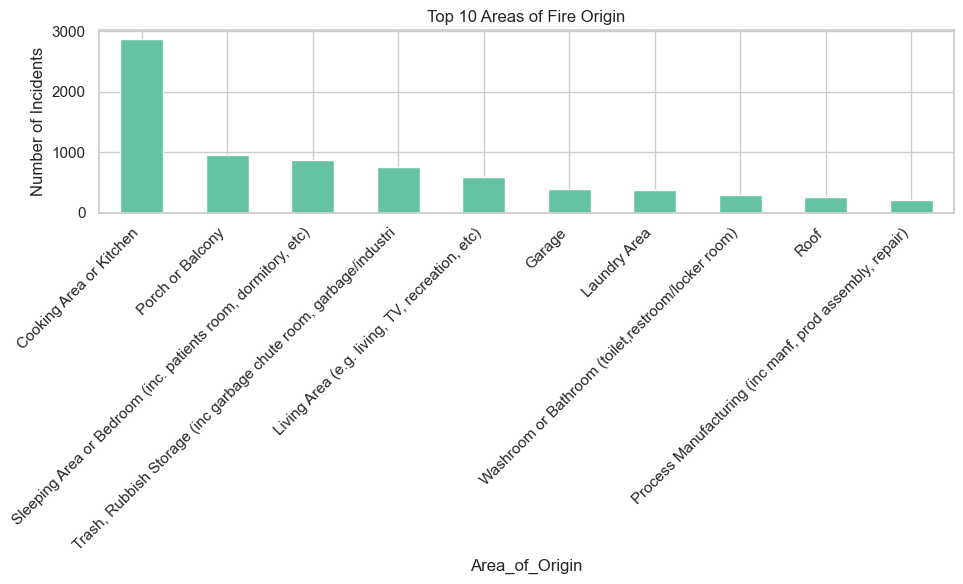

In [10]:
# 1. Most common areas of fire origin
plt.figure(figsize=(10,6))
df['Area_of_Origin'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Areas of Fire Origin")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "01_area_of_origin.png"))
plt.show()

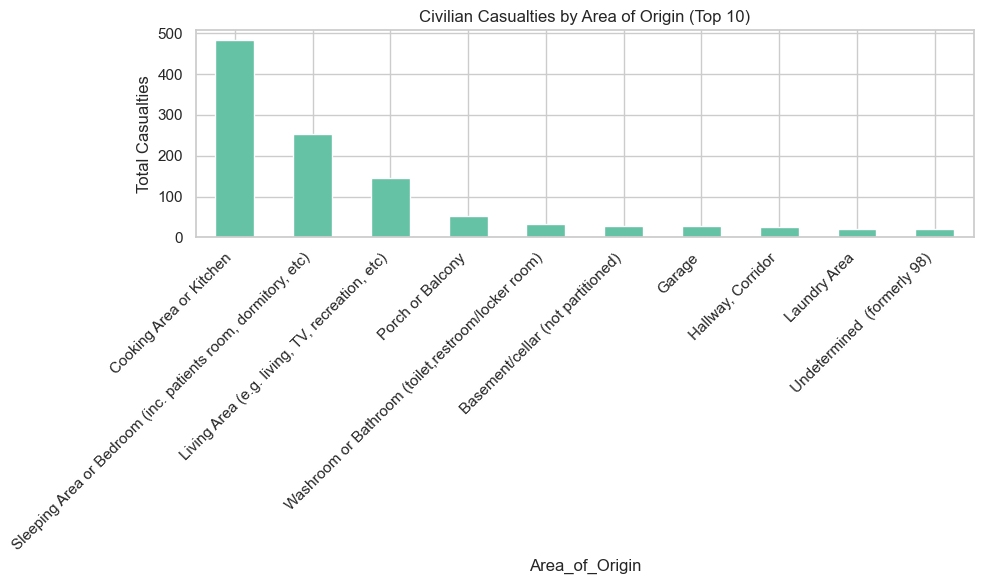

In [11]:
# 2. Total civilian casualties by area of origin
casualties = df.groupby("Area_of_Origin")['Civilian_Casualties'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
casualties.plot(kind='bar')
plt.title("Civilian Casualties by Area of Origin (Top 10)")
plt.ylabel("Total Casualties")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "02_casualties_by_area.png"))
plt.show()

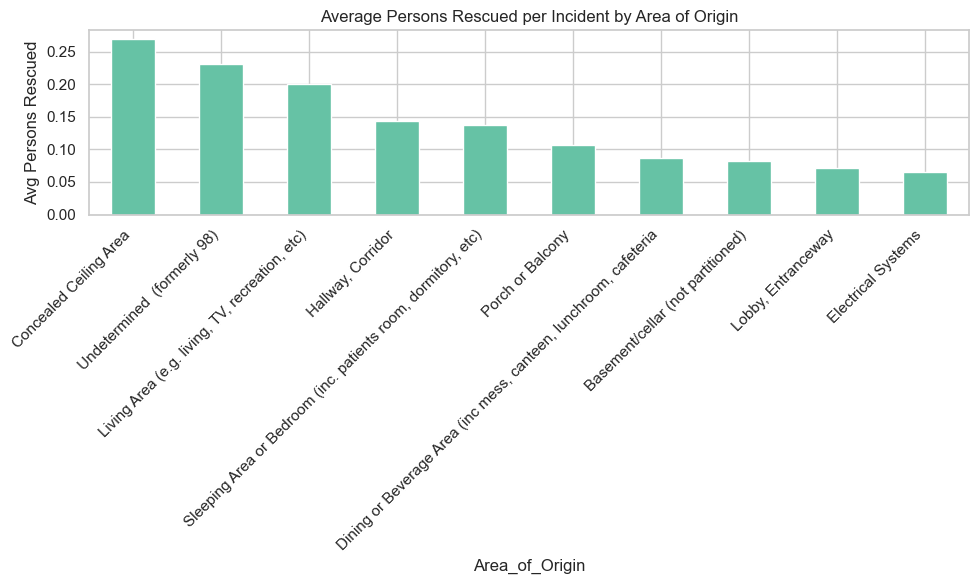

In [12]:
# 3. Average number of persons rescued per fire
rescued = df.groupby("Area_of_Origin")['Count_of_Persons_Rescued'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
rescued.plot(kind='bar')
plt.title("Average Persons Rescued per Incident by Area of Origin")
plt.ylabel("Avg Persons Rescued")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "03_avg_rescued.png"))
plt.show()

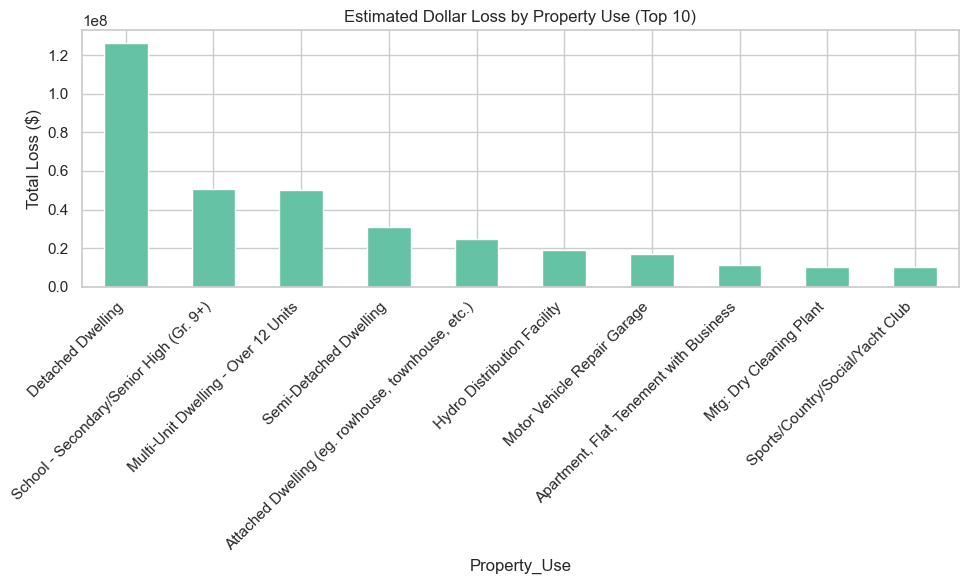

In [13]:
# 4. Total estimated dollar loss per property type
loss = df.groupby("Property_Use")['Estimated_Dollar_Loss'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
loss.plot(kind='bar')
plt.title("Estimated Dollar Loss by Property Use (Top 10)")
plt.ylabel("Total Loss ($)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "04_estimated_loss.png"))
plt.show()

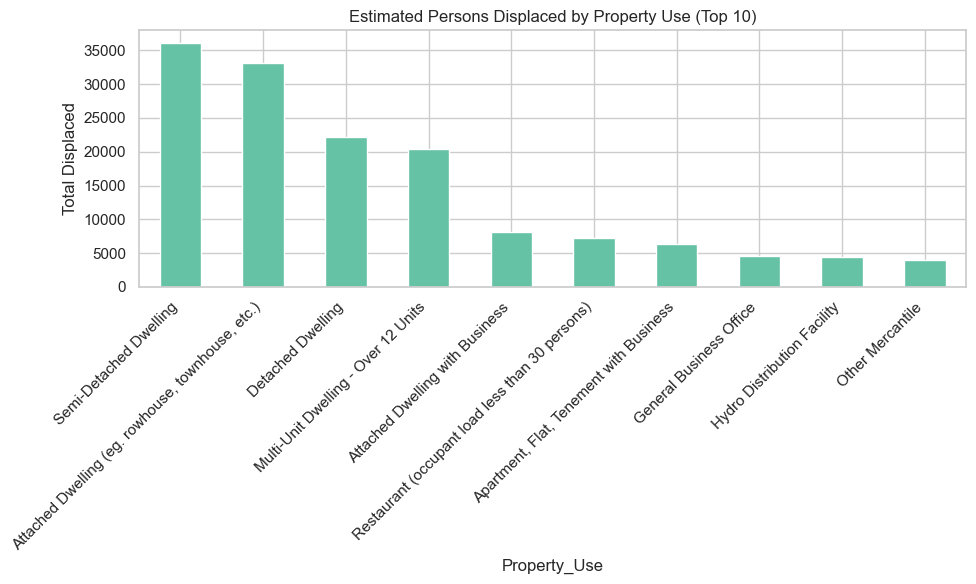

In [14]:
# 5. Total estimated number of persons displaced
displaced = df.groupby("Property_Use")['Estimated_Number_Of_Persons_Displaced'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
displaced.plot(kind='bar')
plt.title("Estimated Persons Displaced by Property Use (Top 10)")
plt.ylabel("Total Displaced")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "05_displaced.png"))
plt.show()

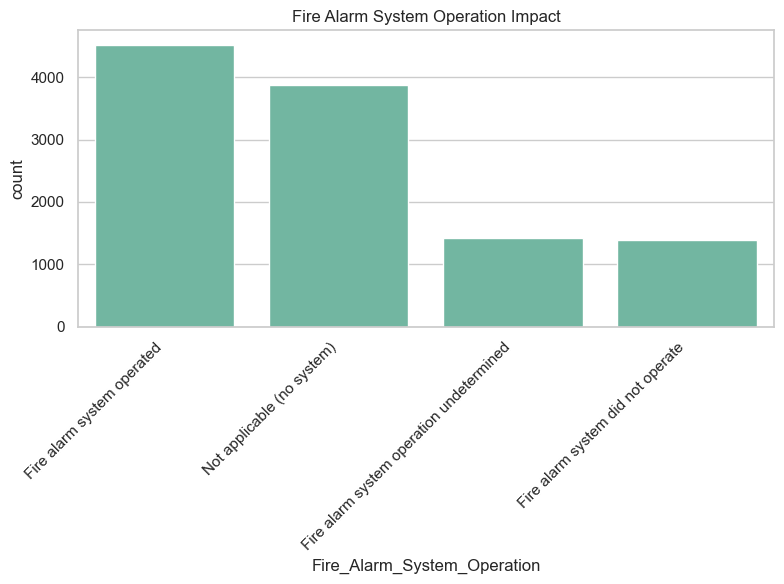

In [15]:
# 6. Fire alarm system operation impact on evacuation
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="Fire_Alarm_System_Operation", order=df['Fire_Alarm_System_Operation'].value_counts().index)
plt.title("Fire Alarm System Operation Impact")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "06_fire_alarm_operation.png"))
plt.show()

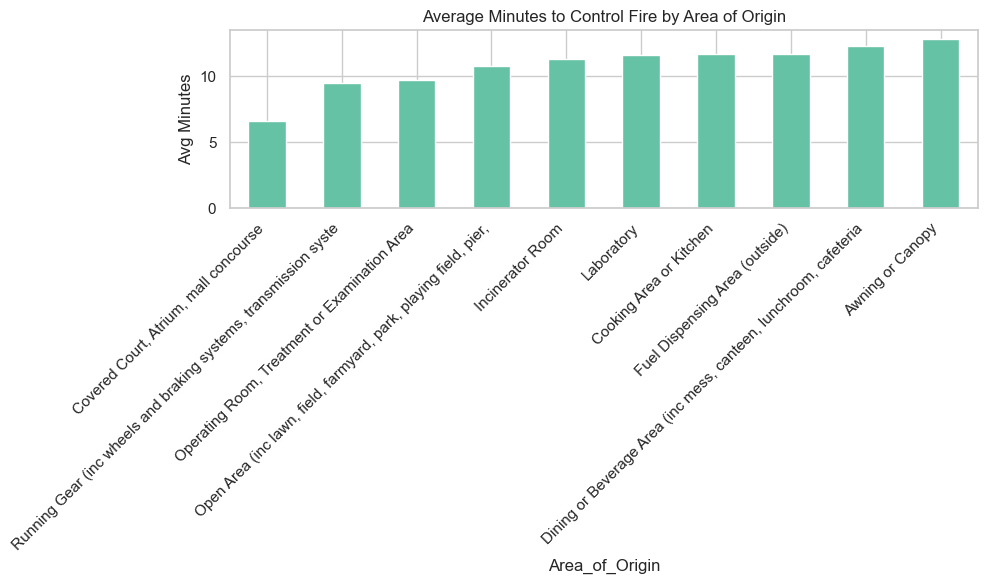

In [16]:
# 7. Average time to control fire
df['TFS_Alarm_Time'] = pd.to_datetime(df['TFS_Alarm_Time'], errors='coerce')
df['Fire_Under_Control_Time'] = pd.to_datetime(df['Fire_Under_Control_Time'], errors='coerce')
df['Minutes_To_Control'] = (df['Fire_Under_Control_Time'] - df['TFS_Alarm_Time']).dt.total_seconds() / 60

control_time = df.groupby("Area_of_Origin")['Minutes_To_Control'].mean().dropna().sort_values().head(10)
plt.figure(figsize=(10,6))
control_time.plot(kind='bar')
plt.title("Average Minutes to Control Fire by Area of Origin")
plt.ylabel("Avg Minutes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "07_time_to_control.png"))
plt.show()

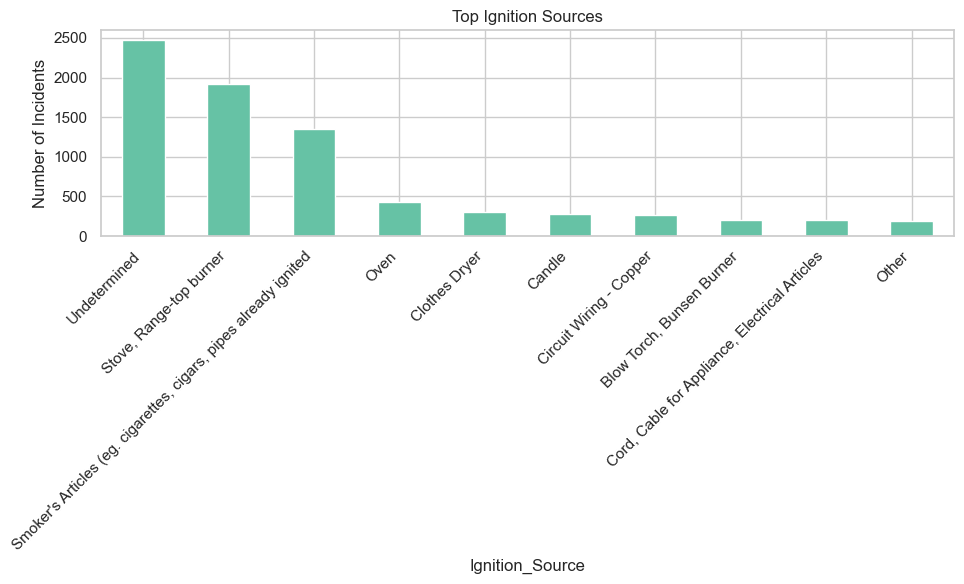

In [17]:
# 8. Most common ignition sources
plt.figure(figsize=(10,6))
df['Ignition_Source'].value_counts().head(10).plot(kind='bar')
plt.title("Top Ignition Sources")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "08_ignition_sources.png"))
plt.show()

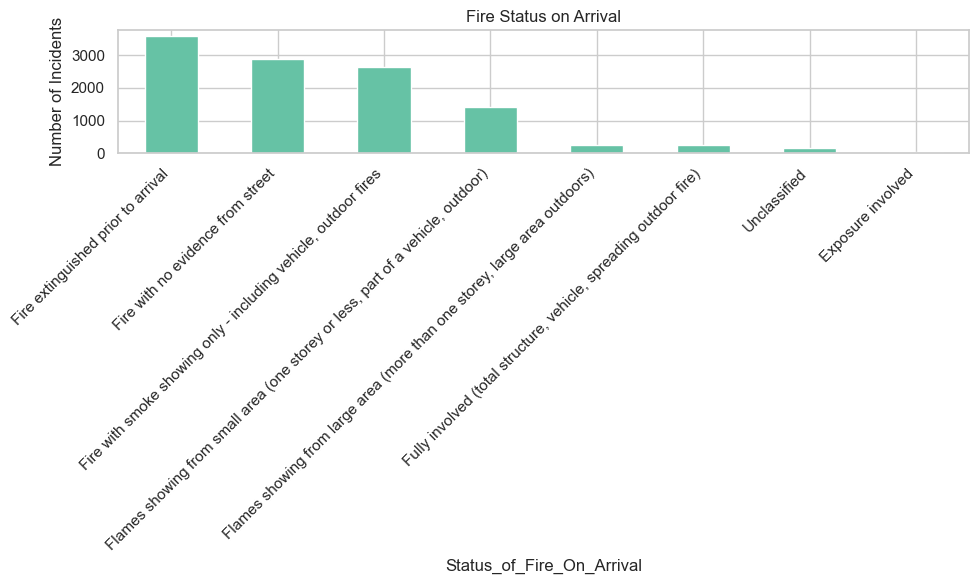

In [18]:
# 9. Fire status on arrival distribution
plt.figure(figsize=(10,6))
df['Status_of_Fire_On_Arrival'].value_counts().head(10).plot(kind='bar')
plt.title("Fire Status on Arrival")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "09_fire_status_on_arrival.png"))
plt.show()

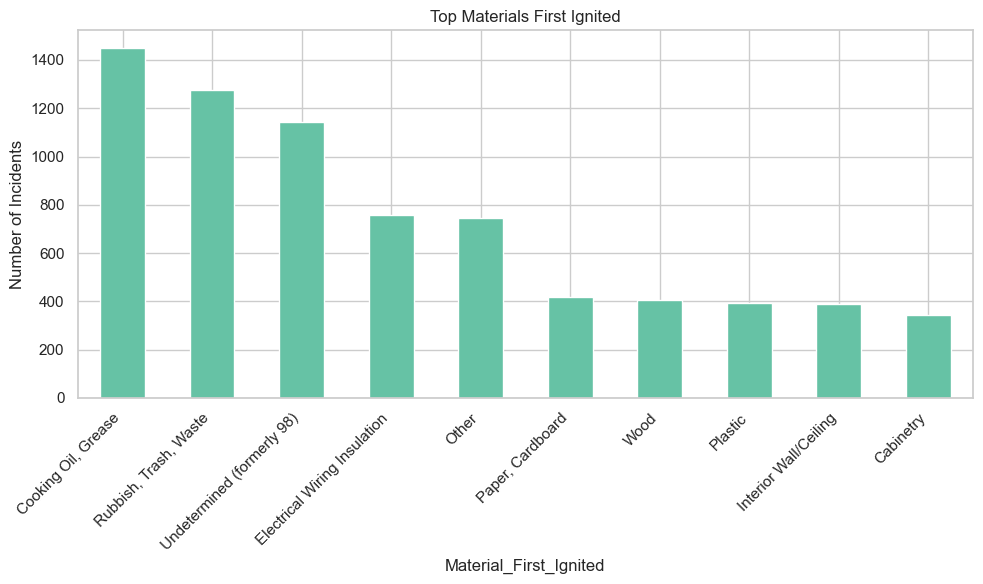

In [19]:
# 10. Top materials first ignited
plt.figure(figsize=(10,6))
df['Material_First_Ignited'].value_counts().head(10).plot(kind='bar')
plt.title("Top Materials First Ignited")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "10_materials_first_ignited.png"))
plt.show()

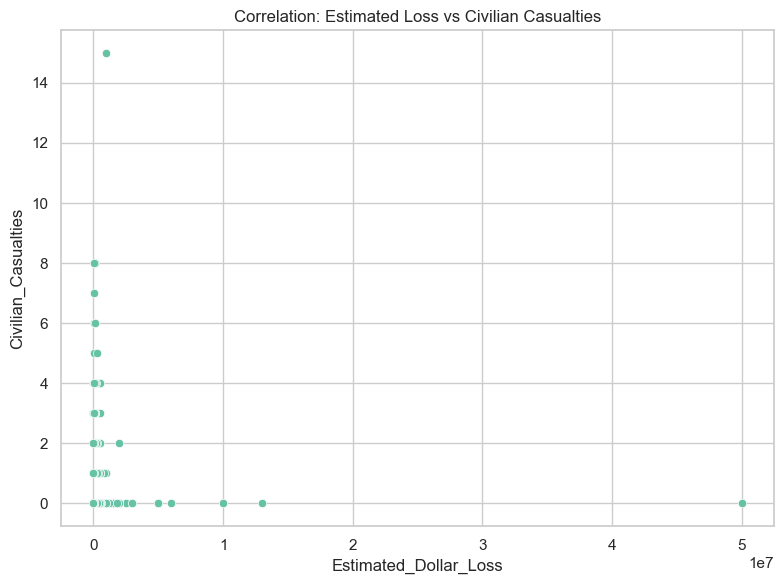

In [20]:
# 11. Correlation between estimated loss and civilian casualties
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Estimated_Dollar_Loss", y="Civilian_Casualties")
plt.title("Correlation: Estimated Loss vs Civilian Casualties")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "11_loss_vs_casualties.png"))
plt.show()

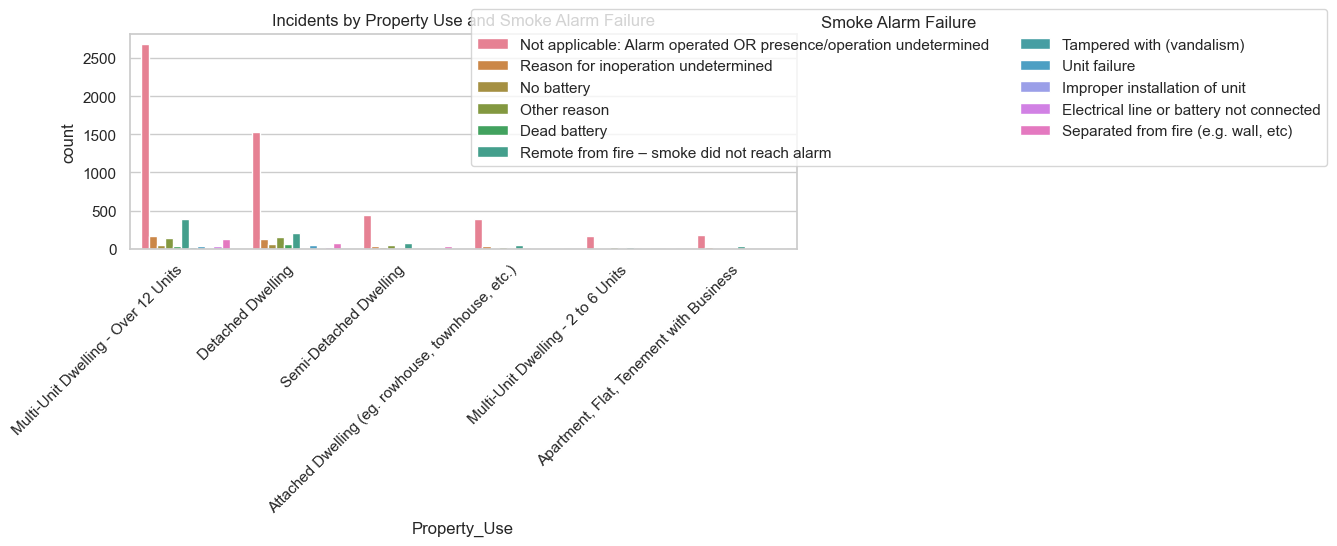

In [25]:
# 12. Fires by property use and smoke alarm presence
plt.figure(figsize=(12,6))
sns.countplot(data=df, 
              x="Property_Use", 
              hue="Smoke_Alarm_at_Fire_Origin_Alarm_Failure",
              order=df['Property_Use'].value_counts().head(6).index)

plt.title("Incidents by Property Use and Smoke Alarm Failure")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Smoke Alarm Failure", loc="best", bbox_to_anchor=(0.5, 1.15), ncol=2)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "12_property_vs_smoke_alarm.png"), bbox_inches="tight")
plt.show()